In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lime)

In [3]:
str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


In [4]:
lime.1 <- glm(Foliage ~ Origin*DBH, data=lime, family = Gamma(link="log"))

In [5]:
coef(summary(lime.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.647197197,0.138543841,-11.8893571,6.388021e-28
OriginNatural,-0.114534337,0.189245536,-0.6052155,5.453980e-01
OriginPlanted,-0.391213146,0.256287019,-1.5264649,1.277282e-01
DBH,0.118086156,0.007392717,15.9733099,2.789594e-44
OriginNatural:DBH,-0.005358695,0.010384838,-0.5160114,6.061474e-01
OriginPlanted:DBH,0.029264885,0.013910663,2.1037736,3.605661e-02


In [6]:
anova(lime.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,384,508.4806,NA,NA
Origin,2,19.894208,382,488.5864,18.215952,2.795178e-08
DBH,1,304.854828,381,183.7316,558.275157,1.612080e-76
Origin:DBH,2,2.768591,379,180.9630,2.535036,8.060222e-02


In [7]:
gof.dev <- deviance(lime.1)
gof.pearson <- sum(lime.1$weights * lime.1$residuals^2)

pchisq(gof.dev, df=df.residual(lime.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(lime.1), lower.tail = FALSE)

gof.dev / df.residual(lime.1)
gof.pearson / df.residual(lime.1)

[1] 1

[1] 1

[1] 0.477475

[1] 0.5460655


	Shapiro-Wilk normality test

data:  qr1
W = 0.98736, p-value = 0.001979


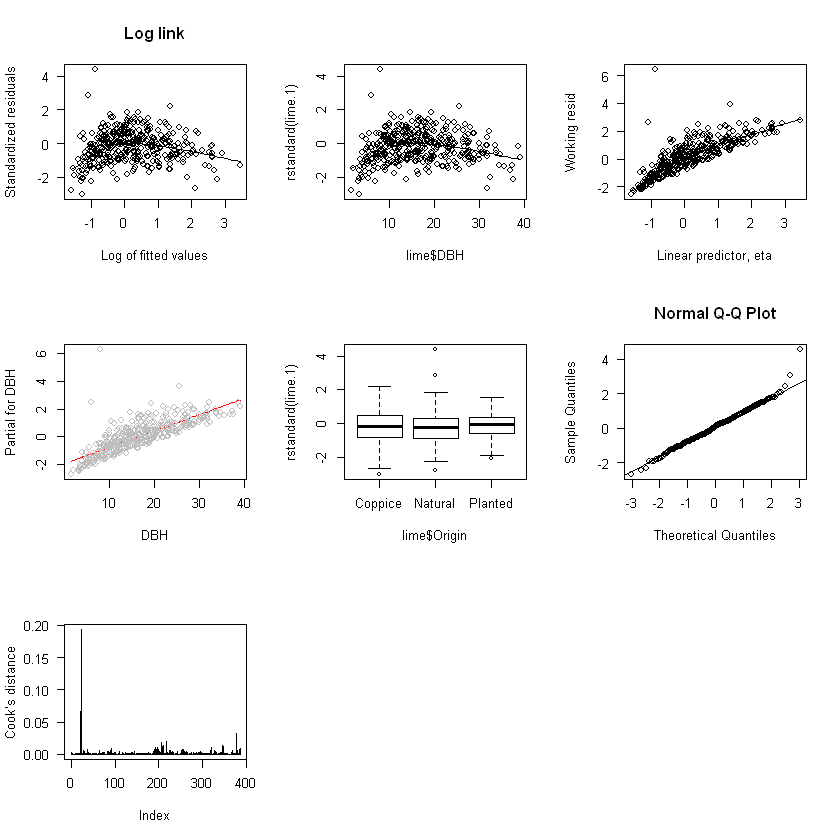

In [10]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(lime.1) ~ log(fitted(lime.1)), main="Log link", las=1,
xlab="Log of fitted values", ylab="Standardized residuals")
## CHECK LINEAR PREDICTOR
scatter.smooth(rstandard(lime.1) ~ lime$DBH)
eta.log <- lime.1$linear.predictor
scatter.smooth(resid(lime.1, type="working") + eta.log ~ eta.log, las=1,
ylab="Working resid", xlab="Linear predictor, eta")
termplot(lime.1, partial.resid = TRUE, terms="DBH")
plot(rstandard(lime.1) ~ lime$Origin)
## QQ PLOT OF RESIDUALS
qqnorm( qr1 <- qresid(lime.1), las=1 ); qqline( qr1 )
## COOK'S DISTANCE
plot( cooks.distance(lime.1), ylab="Cook's distance", las=1, type="h")
shapiro.test(qr1)

In [11]:
colSums(influence.measures(lime.1)$is.inf)

dfb.1_ dfb.OrgN dfb.OrgP  dfb.DBH dfb.ON:D dfb.OP:D    dffit    cov.r 
       0        0        0        0        0        0       14       27 
  cook.d      hat 
       0       14